In [1]:
using PyPlot

In [2]:
function plot_center(vs, fract)
    len = length(vs)
    i_c = len ÷ 2
    i_diff = i_c ÷ fract
    plot_vs = vs[i_c - i_diff:i_c + i_diff]
    plot(plot_vs)
end

plot_center (generic function with 1 method)

In [3]:
function gen_gaussian(len, w, dx)
    I_0 = 1 / w
    E_0 = sqrt(I_0)
    i_c = len ÷ 2
    Es = Vector{typeof(w)}(len)
    @inbounds for i in 1:len
        x = (i - i_c) * dx
        Es[i] = E_0 * exp(-(x / w)^2)
    end
    Es
end

function clip_center(Es, a, dx)
    len = length(Es)
    i_c = len ÷ 2
    Eout = Vector{eltype(Es)}(len)
    i_min = i_c - trunc(Int, a / dx / 2)
    i_max = i_c * 2 - i_min
    @inbounds for i in 1:len
        if i_min < i < i_max
            Eout[i] = Es[i]
        else
            Eout[i] = 0
        end
    end
    Eout
end

clip_center (generic function with 1 method)

In [4]:
E_orig = gen_gaussian(1024 * 8, 40f0, 1f0);
E_clip = clip_center(E_orig, 80f0, 1f0);

In [5]:
function diffract(Es)
    abs2(fftshift(fft(Es)))
end

diffract (generic function with 1 method)

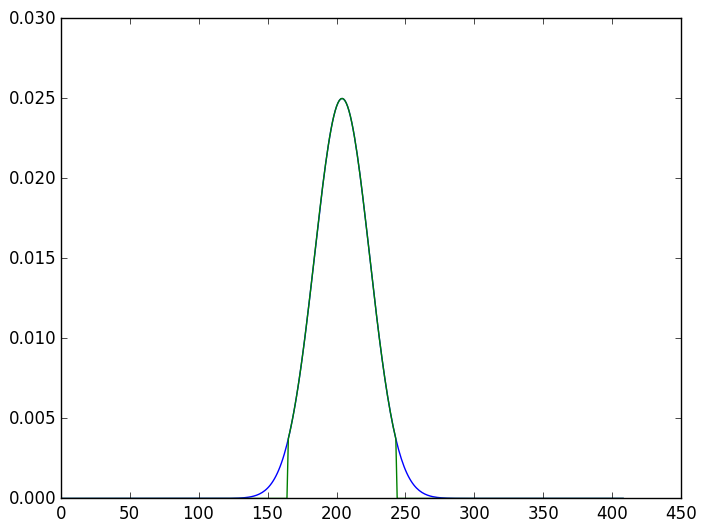

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffdc037dfd0>

In [6]:
plot_center(abs2(E_orig), 20)
plot_center(abs2(E_clip), 20)

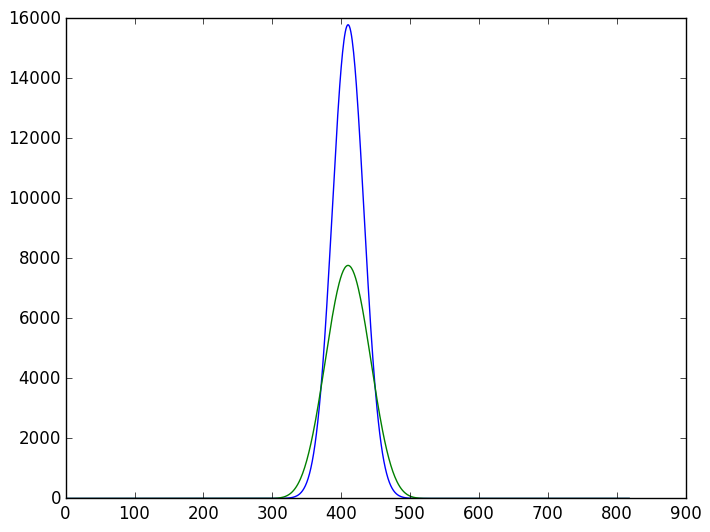

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffdbfbd9fd0>

In [7]:
plot_center(abs2(diffract(E_orig)), 10)
plot_center(abs2(diffract(E_clip)), 10)